In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
original_data = pd.read_csv('/content/drive/MyDrive/빅데이터 분석/빅분2/data/Pokemon.csv')
original_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [ ]:
# 원본 데이터의 복사본을 pokemon에 저장
#pokemon 데이터의 shape 출력 -> 행, 열의 개수
pokemon = original_data.copy()
print(pokemon.shape)
pokemon.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# Legendary 속성이  True인 데이터만 legendary 변수에 저장 -> 기존 인덱스 삭제
legendary = pokemon[pokemon['Legendary'] == True].reset_index(drop=True)
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [ ]:
## Legendary 속성이  False인 데이터만 common 변수에 저장 -> 기존 인덱스 삭제
common = pokemon[pokemon['Legendary'] == False].reset_index(drop=True)
print(common.shape)
common.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# 각 속성의 null값의 합계를 구한다.
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
#속성의 이름과 갯수를 출력한다.
print(len(pokemon.columns))
pokemon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
#도감번호 속성의 유일값 갯수 출략
len(pokemon['#'].unique())

721

In [ ]:
# 도감번호 속성의 유일값 갯수 출력 ->  set() 자료형 사용
#set은 값의 순서가 없다
len(set(pokemon['#']))

721

In [ ]:
# 도감번호가 6번인 포켓몬 데이터 출력
pokemon[pokemon['#'] ==6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [ ]:
print(len(set(pokemon['Name'])))
len(pokemon['Name'].unique())

800


800

In [ ]:
#인덱스 번호로 데이터 접근
pokemon.loc[[6,10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [ ]:
#6번째 행의 10번째 열 데이터 값 출력
pokemon.iloc[6,10]

100

In [ ]:
# Type1과 Type2의 갯수를 세줌
len(set(pokemon['Type 1'])), len(set(pokemon['Type 2']))

(18, 19)

In [1]:
#Type2에서 Type1이 갖고 있지 않은 값을 찾기 위해 차집합 연산을 한다.
set(pokemon['Type 2']) - set(pokemon['Type 1'])

NameError: ignored

In [ ]:
set(pokemon['Type 1']) - set(pokemon['Type 2'])

set()

In [ ]:
#Type1 속성값을 list자료형으로 p_types에 저장
p_types = list(set(pokemon['Type 1']))
p_types

['Bug',
 'Steel',
 'Fighting',
 'Psychic',
 'Dark',
 'Grass',
 'Rock',
 'Electric',
 'Ghost',
 'Normal',
 'Water',
 'Poison',
 'Flying',
 'Ice',
 'Fairy',
 'Ground',
 'Dragon',
 'Fire']

In [ ]:
p_types = list(pokemon['Type 1'].unique())
p_types

['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']

In [ ]:
pokemon['Type 2'].isna().sum()

386

Text(0.5, 1.0, '[Legendary Pokemon]')

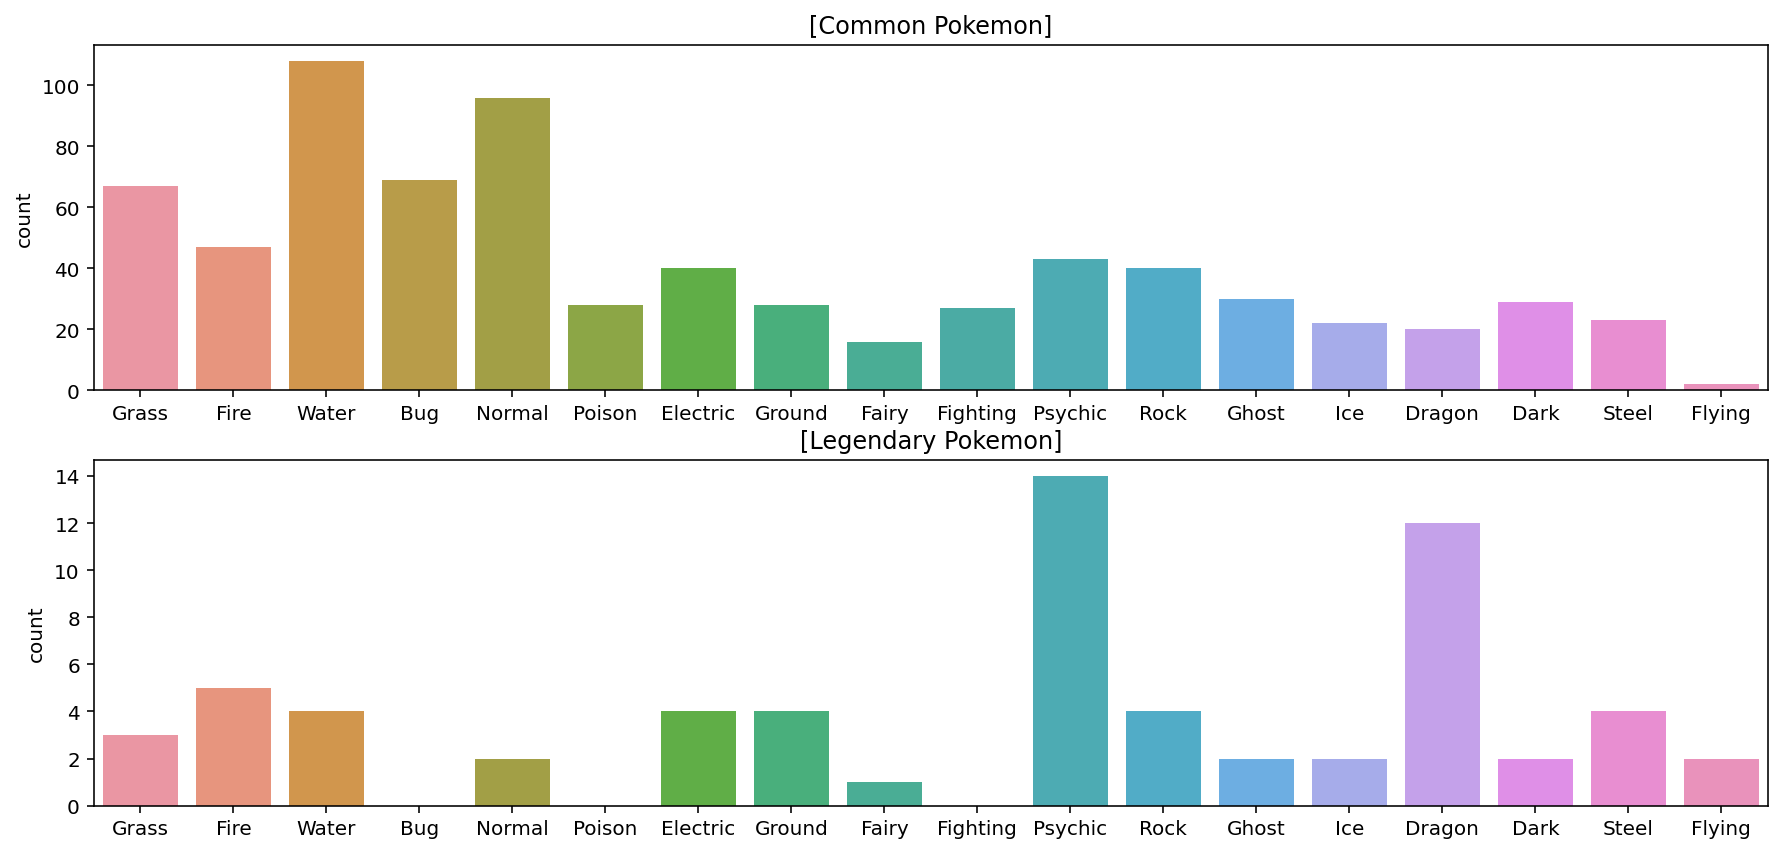

In [ ]:
#그래프를 그릴 사이즈 지정
plt.figure(figsize = (15,7))

#2행 1열 첫번째 데이터
# countplot을 이용해서 일반 포켓몬의 Type1의 속성값 비율 확인하기
# x 축 이름 출력안되게 공백설정
plt.subplot(211)
sns.countplot(data = common,x = 'Type 1', order = p_types).set_xlabel('')
plt.title('[Common Pokemon]')
#2행 1열 두번째 데이터
# countplot을 이용해서 전설 포켓몬의 Type1의 속성값 비율 확인하기
plt.subplot(212)
sns.countplot(data=legendary,x='Type 1',order=p_types).set_xlabel('')
plt.title('[Legendary Pokemon]')

In [ ]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
# by 옵션은 정렬이 되는 기준을 보여줌
pd.pivot_table(pokemon, index = 'Type 1',values = 'Legendary').sort_values(by = ['Legendary'],ascending = False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


Text(0.5, 1.0, '[Legendary Pokemon]')

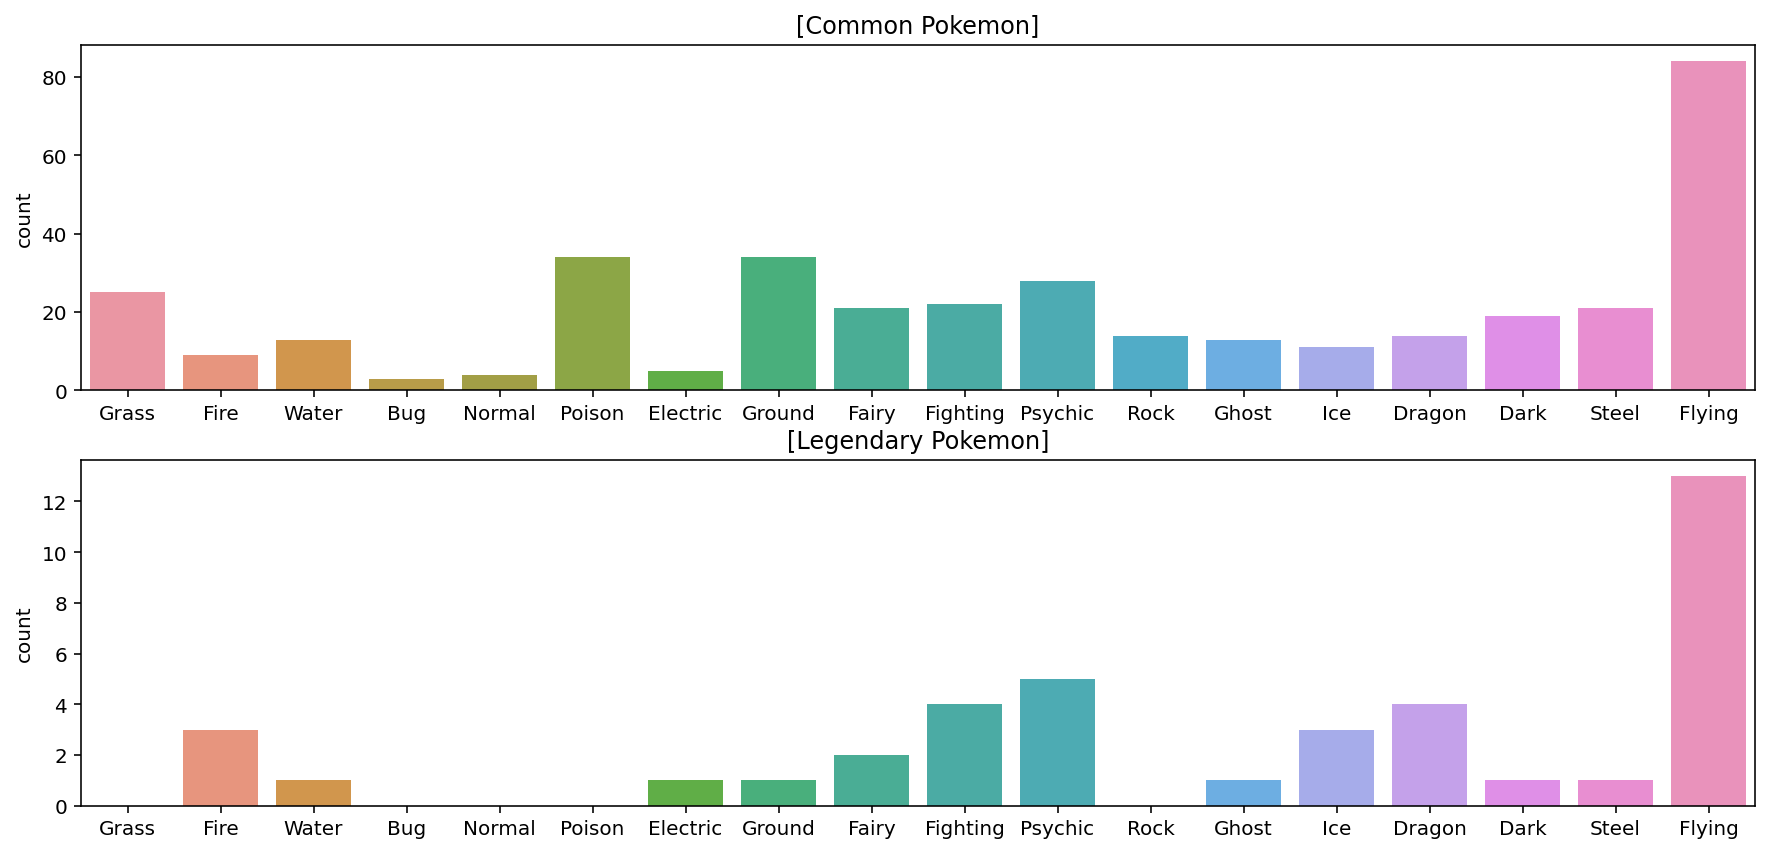

In [ ]:
plt.figure(figsize = (15,7))

plt.subplot(211)
sns.countplot(data = common,x = 'Type 2', order = p_types).set_xlabel('')
plt.title('[Common Pokemon]')
plt.subplot(212)
sns.countplot(data=legendary,x='Type 2',order=p_types).set_xlabel('')
plt.title('[Legendary Pokemon]')

In [ ]:
pd.pivot_table(pokemon, index = 'Type 2',values = 'Legendary').sort_values(by = ['Legendary'],ascending = False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [ ]:
# STATS 변수에 6개 stat값을 저장해준다.
stats = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [ ]:
print('#1 pokemon: ',pokemon.loc[0,'Name'])
print('total: ',pokemon.loc[0,'Total'])
print('stats: ',list(pokemon.loc[0, stats]))
print('sum of all stats: ',pokemon.loc[0,stats].sum())

#1 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318


In [ ]:
same = 0
for i in range(0,800):
  if pokemon.loc[i,'Total'] == pokemon.loc[i,stats].sum():
    same+=1
same

800

In [ ]:
pokemon['Total'].values

array([318, 405, 525, 625, 309, 405, 534, 634, 634, 314, 405, 530, 630,
       195, 205, 395, 195, 205, 395, 495, 251, 349, 479, 579, 253, 413,
       262, 442, 288, 438, 320, 485, 300, 450, 275, 365, 505, 273, 365,
       505, 323, 483, 299, 505, 270, 435, 245, 455, 320, 395, 490, 285,
       405, 305, 450, 265, 405, 290, 440, 320, 500, 305, 455, 350, 555,
       300, 385, 510, 310, 400, 500, 590, 305, 405, 505, 300, 390, 490,
       335, 515, 300, 390, 495, 410, 500, 315, 490, 590, 325, 465, 352,
       310, 460, 325, 475, 325, 500, 305, 525, 310, 405, 500, 600, 385,
       328, 483, 325, 475, 330, 480, 325, 520, 320, 425, 455, 455, 385,
       340, 490, 345, 485, 450, 435, 490, 590, 295, 440, 320, 450, 340,
       520, 460, 500, 455, 490, 495, 500, 600, 490, 200, 540, 640, 535,
       288, 325, 525, 525, 525, 395, 355, 495, 355, 495, 515, 615, 540,
       580, 580, 580, 300, 420, 600, 680, 780, 780, 600, 318, 405, 525,
       309, 405, 534, 314, 405, 530, 215, 415, 262, 442, 265, 39

In [ ]:
pokemon[stats].values.sum(axis=1)

array([318, 405, 525, 625, 309, 405, 534, 634, 634, 314, 405, 530, 630,
       195, 205, 395, 195, 205, 395, 495, 251, 349, 479, 579, 253, 413,
       262, 442, 288, 438, 320, 485, 300, 450, 275, 365, 505, 273, 365,
       505, 323, 483, 299, 505, 270, 435, 245, 455, 320, 395, 490, 285,
       405, 305, 450, 265, 405, 290, 440, 320, 500, 305, 455, 350, 555,
       300, 385, 510, 310, 400, 500, 590, 305, 405, 505, 300, 390, 490,
       335, 515, 300, 390, 495, 410, 500, 315, 490, 590, 325, 465, 352,
       310, 460, 325, 475, 325, 500, 305, 525, 310, 405, 500, 600, 385,
       328, 483, 325, 475, 330, 480, 325, 520, 320, 425, 455, 455, 385,
       340, 490, 345, 485, 450, 435, 490, 590, 295, 440, 320, 450, 340,
       520, 460, 500, 455, 490, 495, 500, 600, 490, 200, 540, 640, 535,
       288, 325, 525, 525, 525, 395, 355, 495, 355, 495, 515, 615, 540,
       580, 580, 580, 300, 420, 600, 680, 780, 780, 600, 318, 405, 525,
       309, 405, 534, 314, 405, 530, 215, 415, 262, 442, 265, 39

In [ ]:
# Total 값과 stat 6개를 더한 값의 일차하는 갯수 확인
# 800개 결과는 모든 데이터의 Total 값과 stats값이 일치함을 나타냄
sum(pokemon['Total'].values ==pokemon[stats].values.sum(axis=1))

800

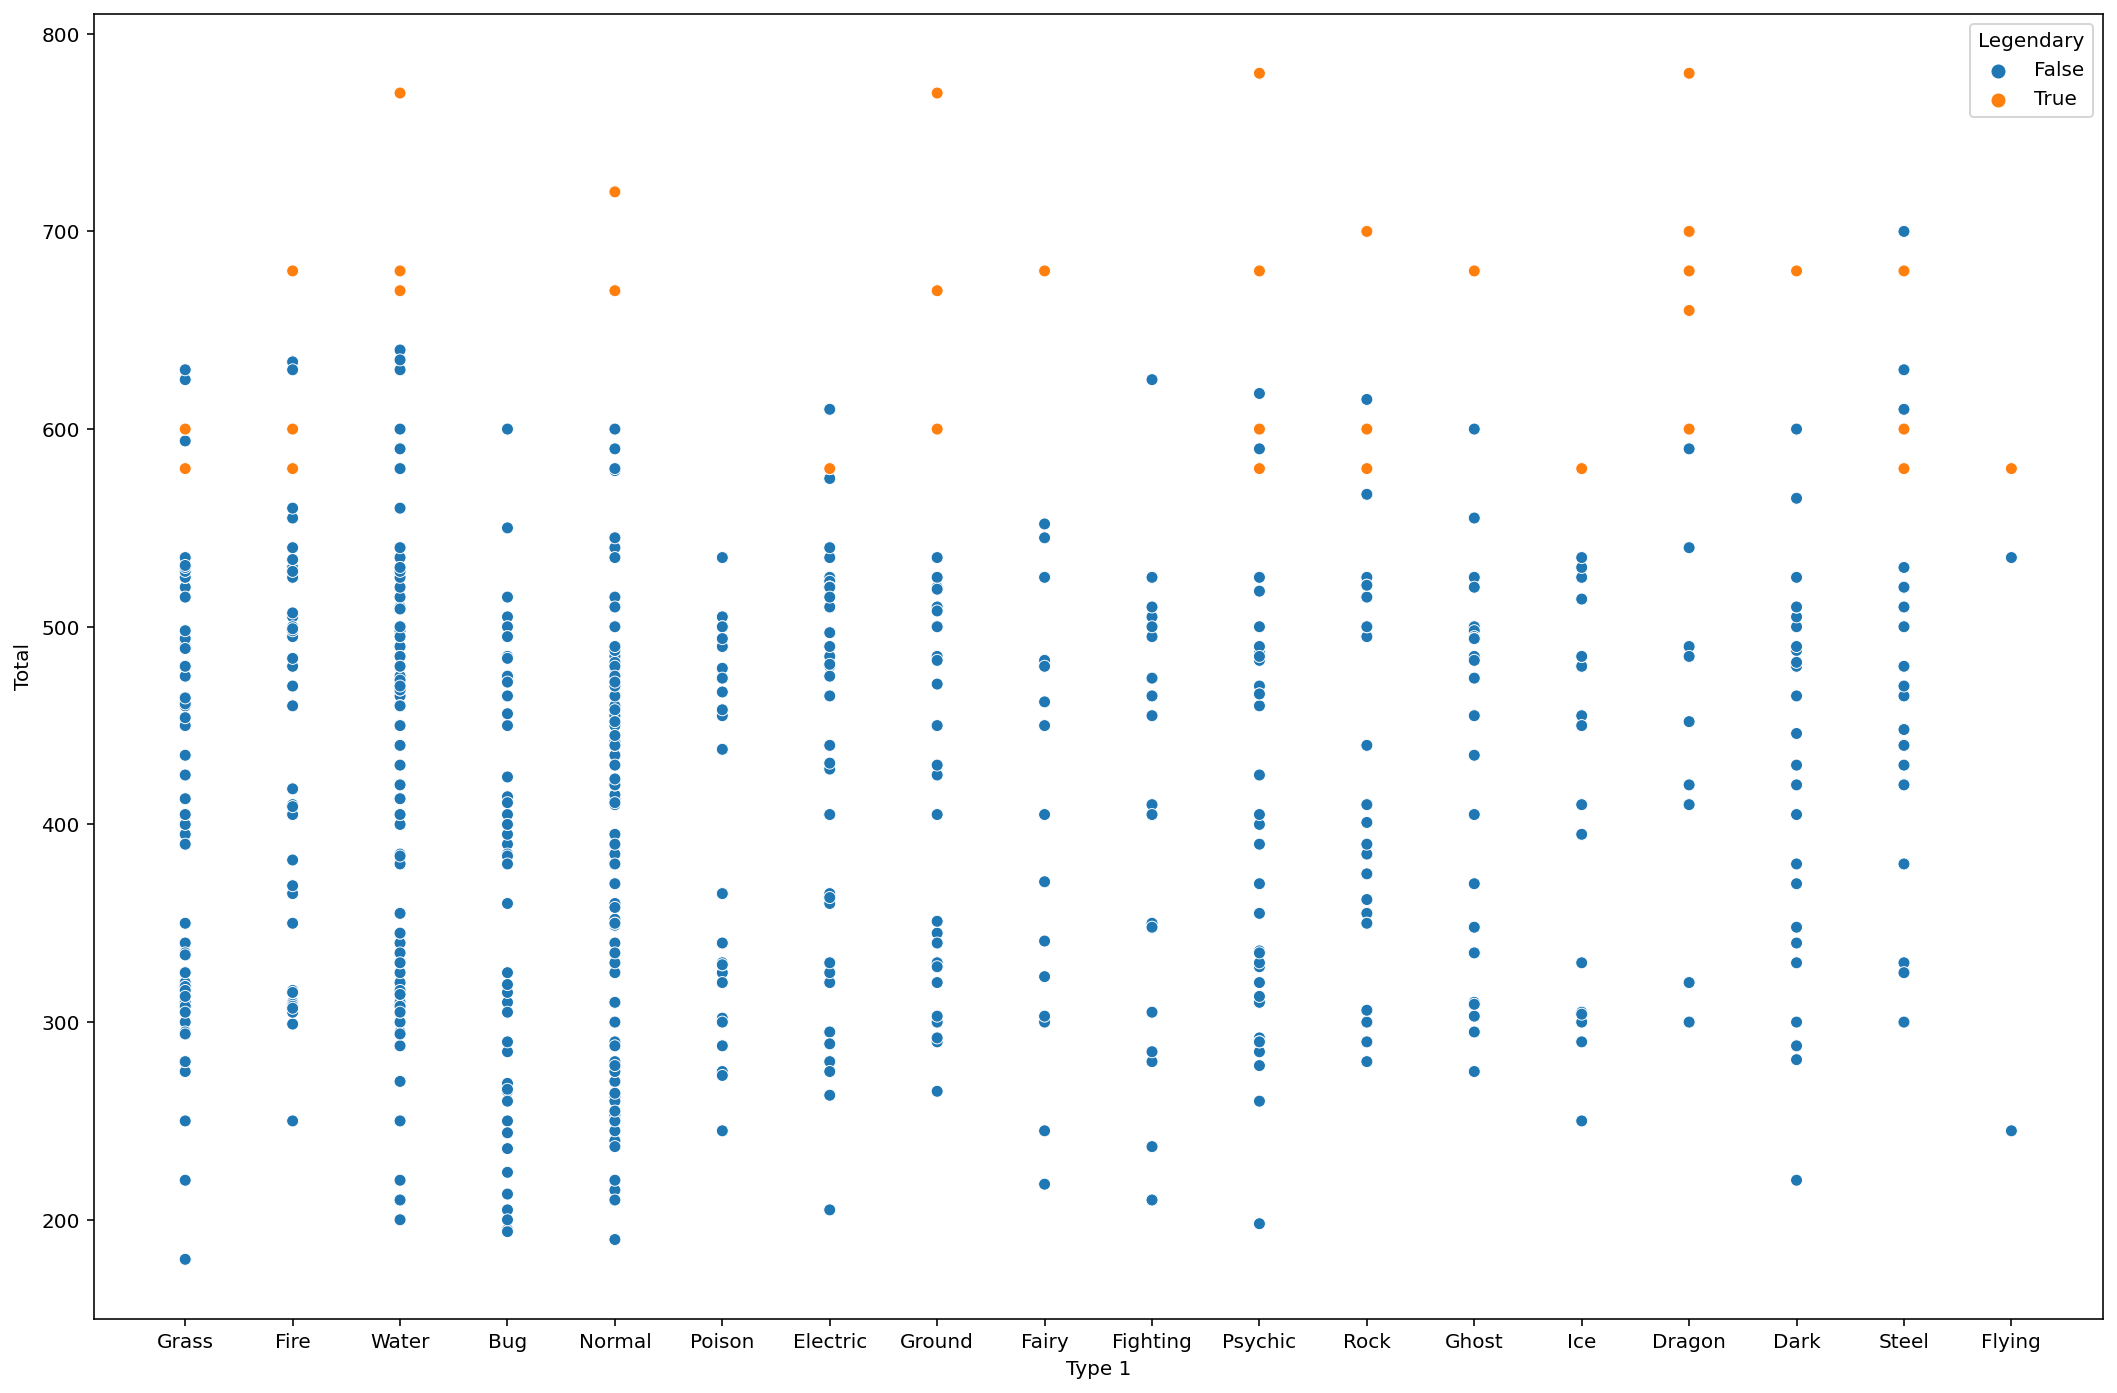

In [ ]:
#서브플롯 생성 그래프 사이즈를 18, 12로 설정
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
#포켓몬 데이터를 이용해 그래프 그림 x는 type 1 y는 total 범주는 Legendary를 사용함
sns.scatterplot(data = pokemon , x= 'Type 1', y = 'Total', hue = 'Legendary')

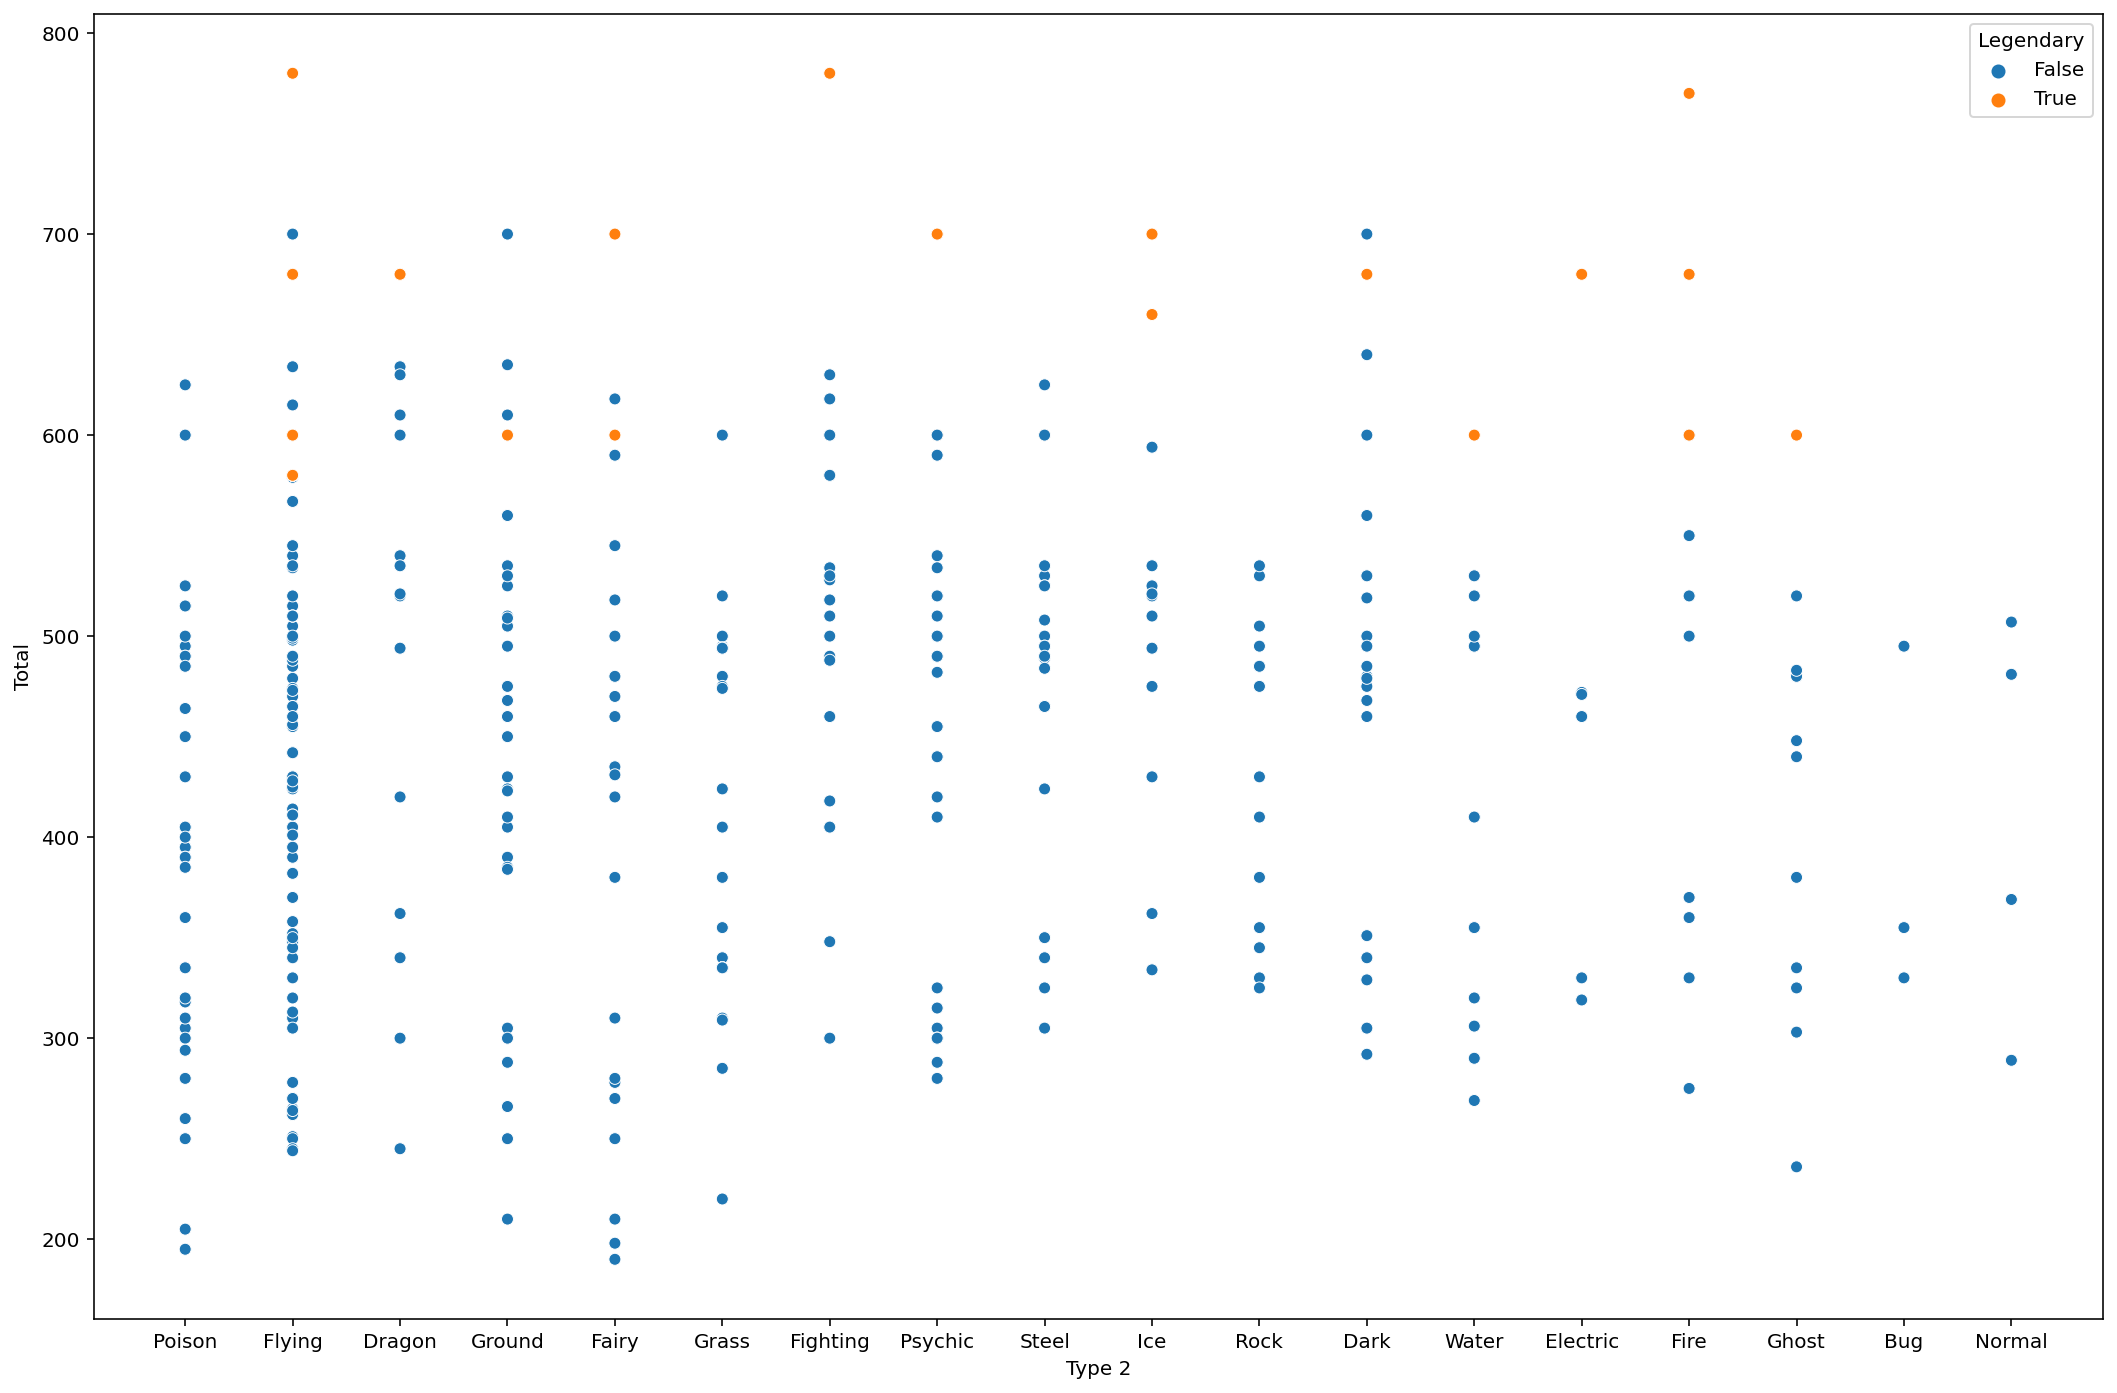

In [ ]:
#서브플롯 생성 그래프 사이즈를 18, 12로 설정
fig, ax = plt.subplots()
fig.set_size_inches(18,12)
#포켓몬 데이터를 이용해 그래프 그림 x는 type 1 y는 total 범주는 Legendary를 사용함
sns.scatterplot(data = pokemon , x= 'Type 2', y = 'Total', hue = 'Legendary')
plt.show()

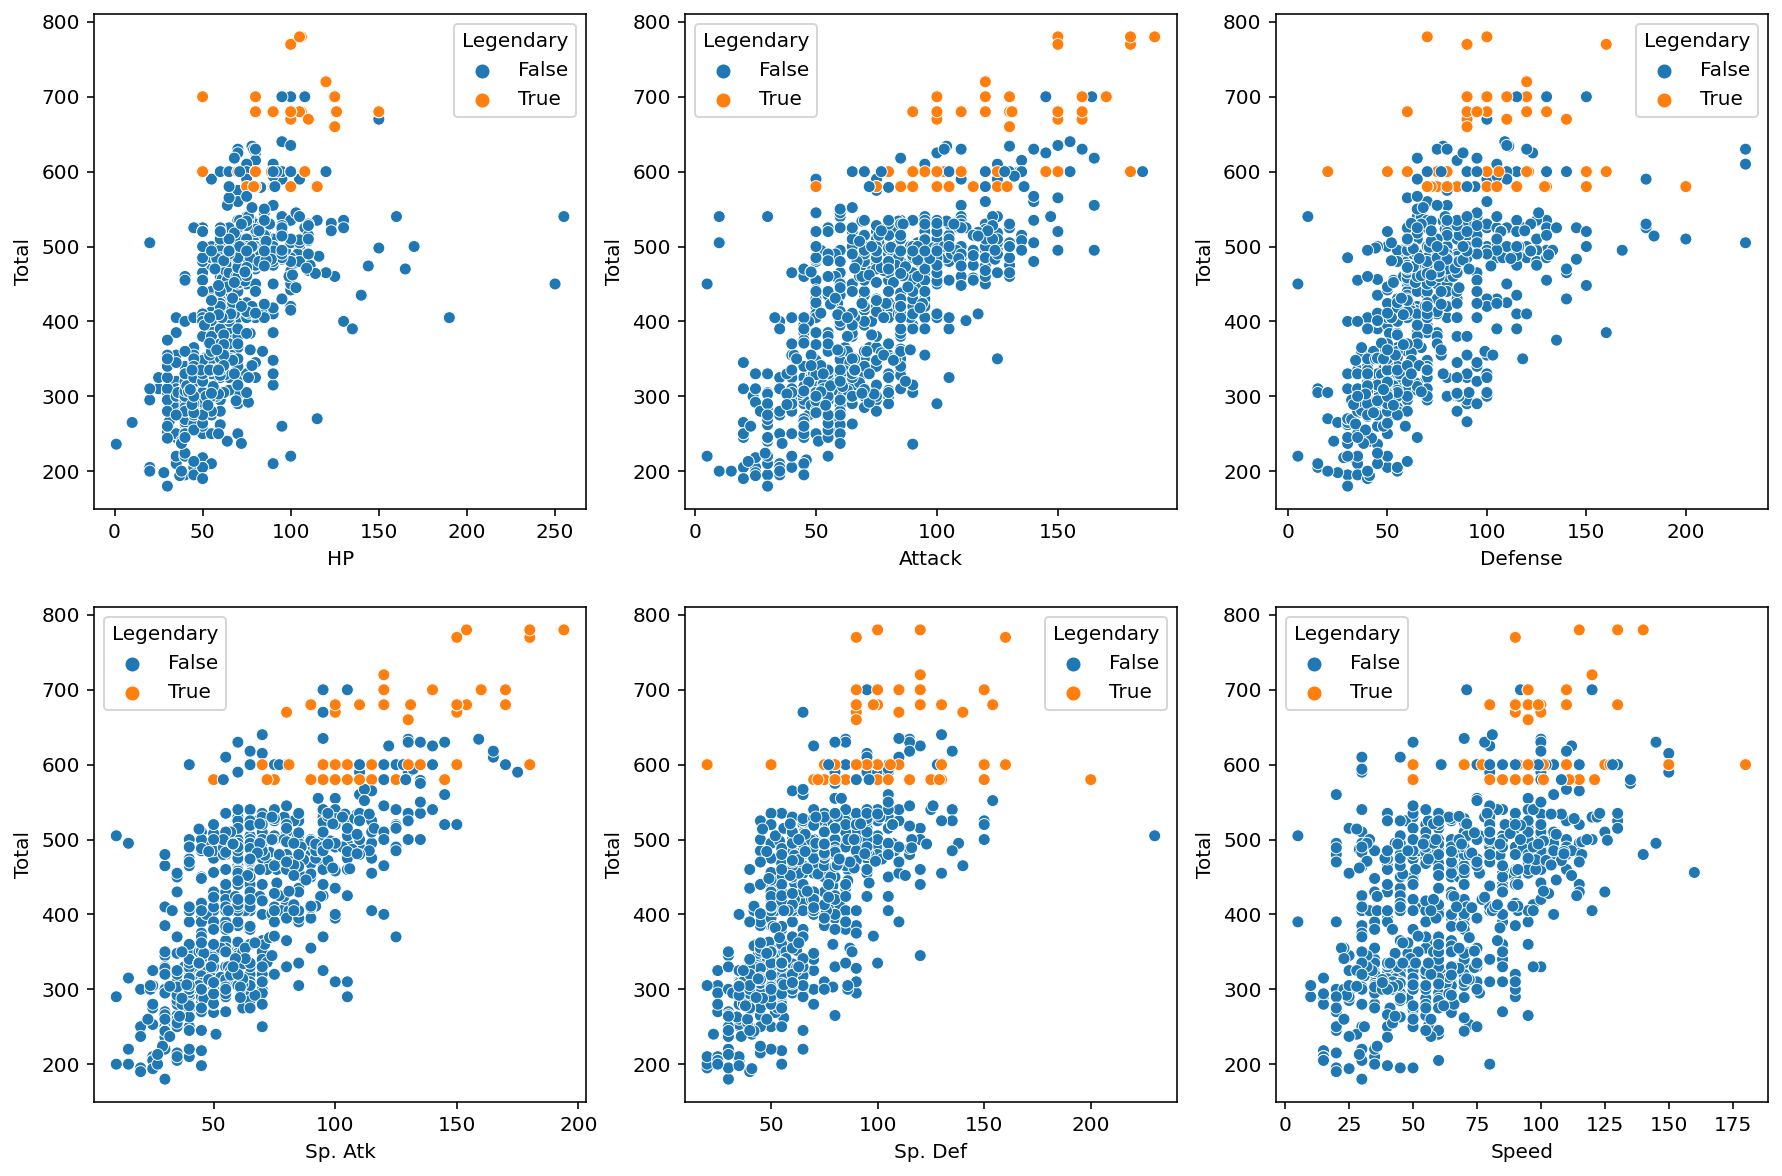

In [ ]:
#2행 3열 6개의 그래프 설정
figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
#figure, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows=3,ncols=2) -> 3행 2열로 변경
figure.set_size_inches(15, 10)

sns.scatterplot(data = pokemon, x = 'HP' , y = 'Total',hue = 'Legendary',ax = ax1)
sns.scatterplot(data = pokemon, x = 'Attack' , y = 'Total',hue = 'Legendary',ax = ax2)
sns.scatterplot(data = pokemon, x = 'Defense' , y = 'Total',hue = 'Legendary',ax = ax3)
sns.scatterplot(data = pokemon, x = 'Sp. Atk' , y = 'Total',hue = 'Legendary',ax = ax4)
sns.scatterplot(data = pokemon, x = 'Sp. Def' , y = 'Total',hue = 'Legendary',ax = ax5)
sns.scatterplot(data = pokemon, x = 'Speed' , y = 'Total',hue = 'Legendary',ax = ax6)
plt.show()

대부분 전설 포켓몬 능력치의 총합 값이 더 높게 나왔지만 
세부 능력치에서는 오히려 전설의 포켓몬이 떨어지는 포켓몬도 있었다. 또한 전설의 포켓몬의 능력치가 대부분 높기 때문에
전설은 오른쪽 상단 일반 포켓몬은 왼쪽 하단에 분포하고 있다.

Text(0.5, 1.0, '[Legendary Pokemon]')

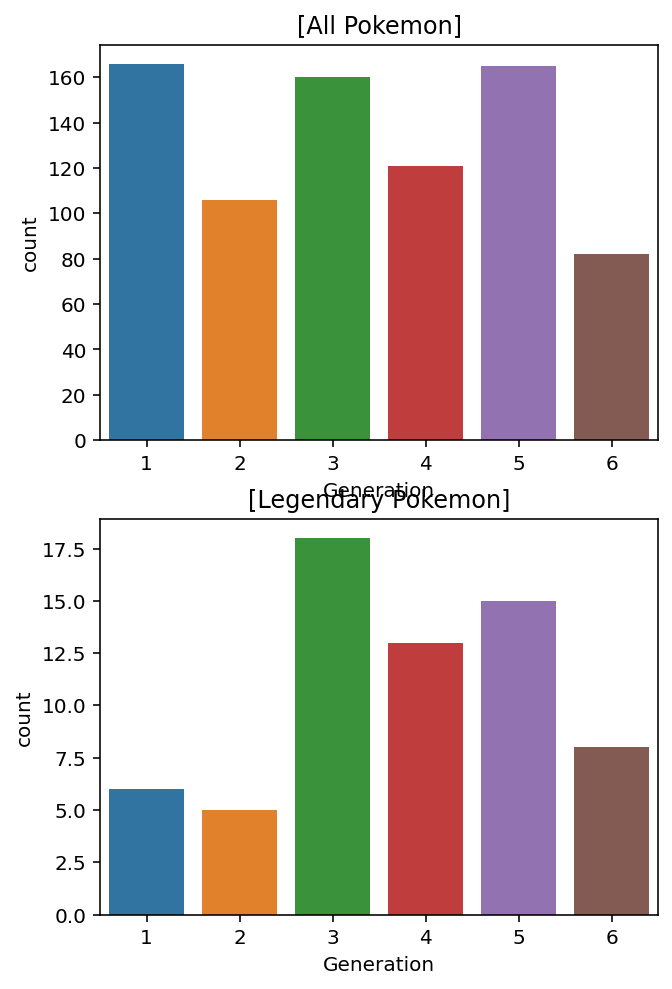

In [ ]:
# 그래프 사이즈를 5,8로 설정
plt.figure(figsize = (5,8))
#2행 1열 그래프의 첫번째 그래프
plt.subplot(211)
sns.countplot(data = pokemon,x = 'Generation')
plt.title('[All Pokemon]')
#2행 1열 그래프의 두번째 그래프
plt.subplot(212)
sns.countplot(data = legendary,x = 'Generation')
plt.title('[Legendary Pokemon]')

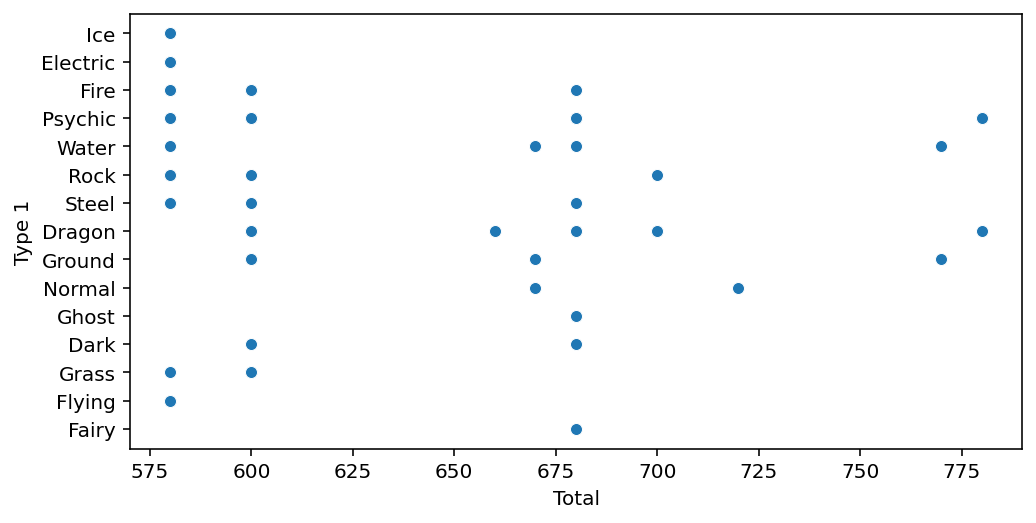

In [ ]:
# 빈 그래프를 만들어주고 사이즈를 설정해준다.
fig , ax = plt.subplots()
fig.set_size_inches(8,4)
# legendary 데이터에 대해 total 과 type 1의 관계를 산점도로 표현한다.
sns.scatterplot(data = legendary, x = 'Total',y= 'Type 1')
plt.show()

In [ ]:
# 전설 포켓몬 데이터의 total 속성의 유일값을 list 형태로 변환후 정렬해서 출력
sorted(list(legendary['Total'].unique()))

[580, 600, 660, 670, 680, 700, 720, 770, 780]

In [ ]:
#위와 동일함
sorted(list(set(legendary['Total'])))

[580, 600, 660, 670, 680, 700, 720, 770, 780]

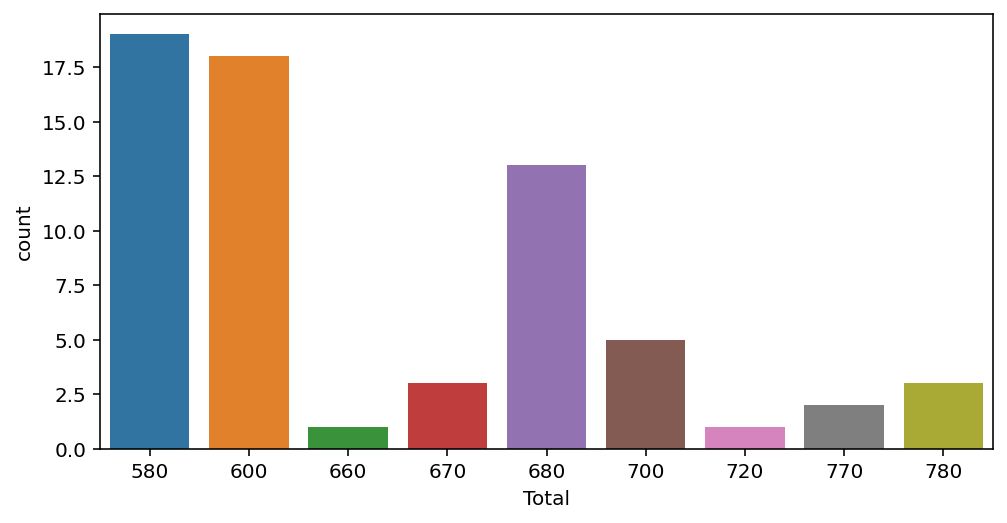

In [ ]:
# 빈 그래프 생성후 사이즈를 설정하고 막대그래프를 이용해 legendary데이터의 total 값을 확인한다.
fig , ax = plt.subplots()
fig.set_size_inches(8,4)

sns.countplot(data = legendary, x = 'Total')
plt.show()

In [ ]:
# 전설포켓몬의 데이터 총 수(65)를 Total 데이터의 중복값을 제거한 값들의 수로 나누었더니
# 1개의 Total 값당 7.22 마리의 전설포켓몬이 속해있다는 것을 확인함. 
round(65/9,2)

7.22

In [ ]:
# 일반 포켓몬 total값 중복되지 않게 list 형태로 구하기
sorted(list(common['Total'].unique()))

[180,
 190,
 194,
 195,
 198,
 200,
 205,
 210,
 213,
 215,
 218,
 220,
 224,
 236,
 237,
 240,
 244,
 245,
 250,
 251,
 253,
 255,
 260,
 262,
 263,
 264,
 265,
 266,
 269,
 270,
 273,
 275,
 278,
 280,
 281,
 285,
 288,
 289,
 290,
 292,
 294,
 295,
 299,
 300,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 313,
 314,
 315,
 316,
 318,
 319,
 320,
 323,
 325,
 328,
 329,
 330,
 334,
 335,
 336,
 340,
 341,
 345,
 348,
 349,
 350,
 351,
 352,
 355,
 358,
 360,
 362,
 363,
 365,
 369,
 370,
 371,
 375,
 380,
 382,
 384,
 385,
 390,
 395,
 400,
 401,
 405,
 409,
 410,
 411,
 413,
 414,
 415,
 418,
 420,
 423,
 424,
 425,
 428,
 430,
 431,
 435,
 438,
 440,
 442,
 445,
 446,
 448,
 450,
 452,
 454,
 455,
 456,
 458,
 460,
 461,
 462,
 464,
 465,
 466,
 467,
 468,
 470,
 471,
 472,
 473,
 474,
 475,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 487,
 488,
 489,
 490,
 494,
 495,
 497,
 498,
 499,
 500,
 505,
 507,
 508,
 509,
 510,
 514,
 515,
 518,
 519,
 520,
 521,
 523,
 525,
 528

In [ ]:
#위와 동일
sorted(list(set(common['Total'])))

[180,
 190,
 194,
 195,
 198,
 200,
 205,
 210,
 213,
 215,
 218,
 220,
 224,
 236,
 237,
 240,
 244,
 245,
 250,
 251,
 253,
 255,
 260,
 262,
 263,
 264,
 265,
 266,
 269,
 270,
 273,
 275,
 278,
 280,
 281,
 285,
 288,
 289,
 290,
 292,
 294,
 295,
 299,
 300,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 313,
 314,
 315,
 316,
 318,
 319,
 320,
 323,
 325,
 328,
 329,
 330,
 334,
 335,
 336,
 340,
 341,
 345,
 348,
 349,
 350,
 351,
 352,
 355,
 358,
 360,
 362,
 363,
 365,
 369,
 370,
 371,
 375,
 380,
 382,
 384,
 385,
 390,
 395,
 400,
 401,
 405,
 409,
 410,
 411,
 413,
 414,
 415,
 418,
 420,
 423,
 424,
 425,
 428,
 430,
 431,
 435,
 438,
 440,
 442,
 445,
 446,
 448,
 450,
 452,
 454,
 455,
 456,
 458,
 460,
 461,
 462,
 464,
 465,
 466,
 467,
 468,
 470,
 471,
 472,
 473,
 474,
 475,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 487,
 488,
 489,
 490,
 494,
 495,
 497,
 498,
 499,
 500,
 505,
 507,
 508,
 509,
 510,
 514,
 515,
 518,
 519,
 520,
 521,
 523,
 525,
 528

In [ ]:
# 일반 포켓몬의 total값을 중복되지 않게 정렬한 후 전체 갯수 출력
len(sorted(list(common['Total'].unique())))

195

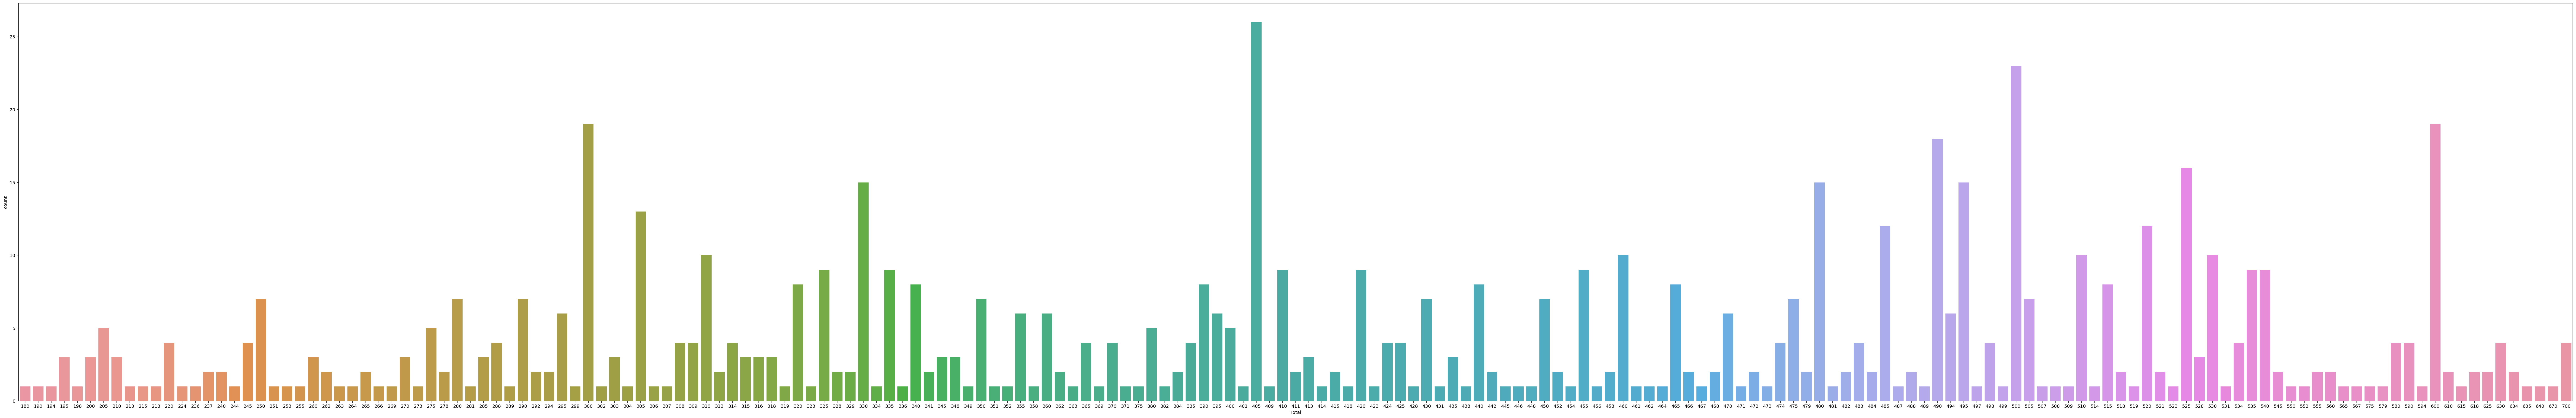

In [ ]:
# 일반 포켓몬으로 countplot 그려보기
fig , ax = plt.subplots()
fig.set_size_inches(100,16)

#일반 포켓몬 데이터의 total값을 막대그래프로 표현함.
sns.countplot(data = common, x = 'Total')
plt.show()

In [ ]:
len(sorted(list(common['Total'].unique())))

195

In [ ]:
#일반 포켓몬의 하나의 total 값당 몇마리 정도가 같은 값을 가지는지 평균 구해보기
round(len(common['Total'])/len(common['Total'].unique()),2)

3.77

In [ ]:
len(common['Total'])

735

In [ ]:
#전설 포켓몬의 도감번호가 여러번 나온 도감번호 출력
l_count = legendary['#'].value_counts()
#도감번호 빈도수가 1초과인 값들만 정렬해서 저장
l_cnt_idx = sorted(list(l_count[l_count > 1].index))

In [ ]:
# 도감번호가 1초과인 데이터 중 첫번째 데이터와 일치하는 전설 포켓몬 도감번호를 찾아서 출력
legendary[legendary['#']==l_cnt_idx[0]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
5,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


In [ ]:
#merge df 빈 데이터 프레임 생성
#반복문으로 i_cnt_idx에 들어가 있는 값이랑
#도감번호가 일치하는 데이터들 합쳐주기
#merge_df출력
merge_df = pd.DataFrame()
for i in l_cnt_idx:
  merge_df = pd.concat([merge_df,legendary[legendary['#']==i]])
merge_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
5,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
14,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
15,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
16,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
17,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
18,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
19,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
20,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [ ]:
# 최대 보여지는 행의 갯수를 설정해줌.
pd.options.display.max_rows = 65
legendary

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
5,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
6,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
7,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
8,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
9,249,Lugia,Psychic,Flying,680,106,90,130,90,154,110,2,True


In [ ]:
# names변수에 concat으로 저장하기 시험에 안나옴
names = pd.DataFrame()
n1,n2,n3,n4,n5,n6,n7,n8 = legendary.loc[3:6], legendary.loc[14:24], legendary.loc[25:29], legendary.loc[36:38], legendary.loc[39:40], legendary.loc[46:50], legendary.loc[52:57], legendary.loc[60:64]

In [ ]:
names = pd.concat([names,n1,n2,n3,n4,n5,n6,n7])
names

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
5,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
6,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
14,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
15,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
16,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
17,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
18,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
19,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True


In [ ]:
# 전설포켓몬 데이터에서 이름에 Forme이 들어간 데이터 찾아서 출력하기
legendary[legendary['Name'].str.contains('Forme')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
25,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
26,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
27,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
28,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
36,487,GiratinaAltered Forme,Ghost,Dragon,680,150,100,120,100,120,90,4,True
37,487,GiratinaOrigin Forme,Ghost,Dragon,680,150,120,100,120,100,90,4,True
39,492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True
40,492,ShayminSky Forme,Grass,Flying,600,100,103,75,120,75,127,4,True
46,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
47,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True


In [ ]:

common['Name']

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
730      GourgeistSuper Size
731                 Bergmite
732                  Avalugg
733                   Noibat
734                  Noivern
Name: Name, Length: 735, dtype: object

In [ ]:
#legendary에 있는 Name 속성의 데이터를 lambda(사용자 정의 함수)를 이용해서 
#글자수를 세어서 name_count라는 속성에 저장하기
legendary['name_count']=legendary['Name'].apply(lambda i: len(i))
legendary.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [ ]:
# 데이터를 legendary -> common 으로 바꿔서 출력해봄
common['name_count'] = common['Name'].apply(lambda i : len(i))
common.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


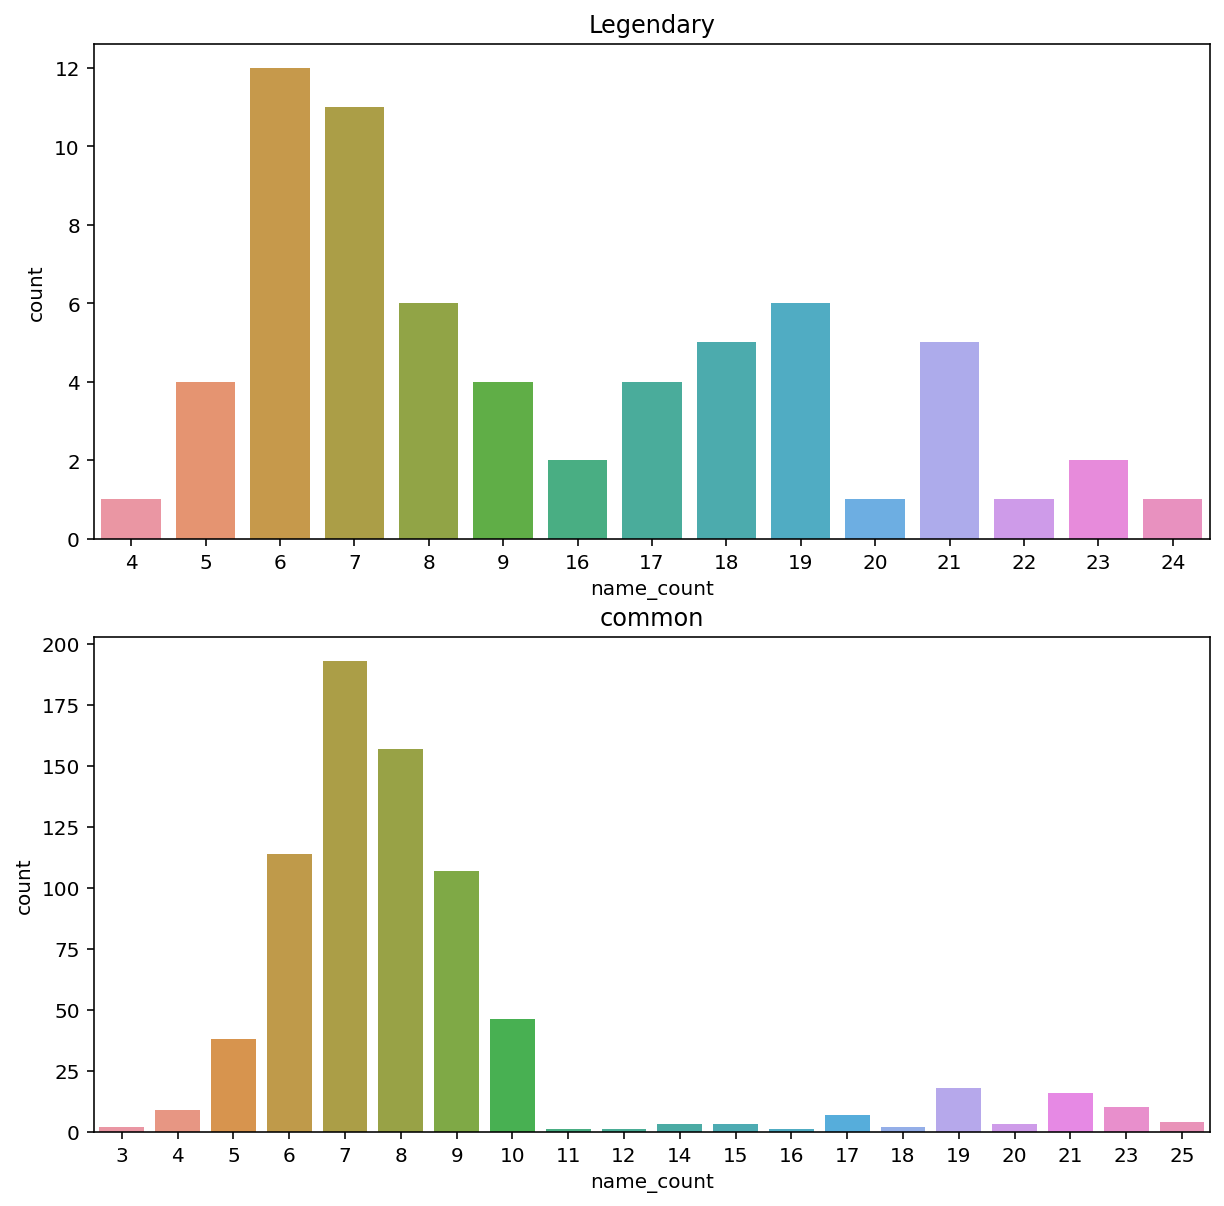

In [ ]:
# 그래프 사이즈 10 , 10 생성
plt.figure(figsize = (10,10))
#2행 1열의 첫번째 위치
plt.subplot(211)
sns.countplot(data = legendary,x = 'name_count')
plt.title('Legendary')
#2행 1열의 두번째 위치
plt.subplot(212)
sns.countplot(data = common,x = 'name_count')
plt.title('common')
plt.show()

In [ ]:
# legendary 데이터의 name_count 속성이 16이상인 데이터의 갯수를 전설포켓몬 갯수로 
#나눠서 소수점 2자리 까지 출력되도록 한다.
print(round(len(legendary[legendary['name_count']>=16]) / len(legendary) * 100,2),'%')

41.54 %


In [ ]:
# 일반 포켓몬의 이름 글자수가 16이상인 데이터의 비율
print(round(len(common[common['name_count']>=16]) / len(common) * 100,2),'%')

8.3 %


In [ ]:
# 전체 데이터에 이름 길이 추가
pokemon['name_count']=pokemon['Name'].apply(lambda i : len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [ ]:
# 이름 글자수가 16이상인 데이터를 long_name 속성에 저장함 true false 값으로 들어감
pokemon['long_name'] = pokemon['name_count']>=16 
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True


In [ ]:
#  name 속성에 있는 공백 데이터를 지워준 다음 Name_nospace 속성에 저장하고 끝에서부터 5개의 데이터 출력함
pokemon['Name_nospace'] = pokemon['Name'].apply(lambda i : i.replace(' ' , ''))
pokemon['Name_nospace'].tail(5)

795               Diancie
796    DiancieMegaDiancie
797    HoopaHoopaConfined
798     HoopaHoopaUnbound
799             Volcanion
Name: Name_nospace, dtype: object

In [ ]:
# Name_nospace 속성에 저장된 데이터가 알파벳인지 아닌지 lambda 문법을 이용해 name_isalpah 속성에 저장
pokemon['name_isalpha'] = pokemon['Name_nospace'].apply(lambda i : i.isalpha())
# 대괄호가 2개인 이유 속성을 2개 이상 출력할때는 출력하는 속성을 리스트 형태로 담아서 출력함.
pokemon[['Name','Name_nospace','name_isalpha']].head(10)

,Name,Name_nospace,name_isalpha
0,Bulbasaur,Bulbasaur,True
1,Ivysaur,Ivysaur,True
2,Venusaur,Venusaur,True
3,VenusaurMega Venusaur,VenusaurMegaVenusaur,True
4,Charmander,Charmander,True
5,Charmeleon,Charmeleon,True
6,Charizard,Charizard,True
7,CharizardMega Charizard X,CharizardMegaCharizardX,True
8,CharizardMega Charizard Y,CharizardMegaCharizardY,True
9,Squirtle,Squirtle,True


In [ ]:
# name_isalpha 속성의 값이 False(알파벳이 아닌것)인 데이터의 형태와 데이터를 출력함
print(pokemon[pokemon['name_isalpha'] == False].shape)
pokemon[pokemon['name_isalpha'] == False]

(9, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran♀,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran♀,False
37,32,Nidoran♂,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran♂,False
90,83,Farfetch'd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,False,Farfetch'd,False
131,122,Mr. Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon2,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon2,False
270,250,Ho-oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho-oh,False
487,439,Mime Jr.,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon-Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon-Z,False
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [ ]:
#pokemon 에 들어 있는 데이터를 to_replace에 있는 값을 value 값으로 변경해준다.(특수문자, 기호, 숫자 제거)
pokemon = pokemon.replace(to_replace = 'Nidoran♀',value = 'NidoranF')
pokemon = pokemon.replace(to_replace = 'Nidoran♂',value = 'NidoranM')
pokemon = pokemon.replace(to_replace = "Farfetch'd",value = 'Farfetchd')
pokemon = pokemon.replace(to_replace = 'Mr. Mime',value = 'Mr Mime')
pokemon = pokemon.replace(to_replace = 'Porygon2',value = 'PorygonTwo')
pokemon = pokemon.replace(to_replace = 'Ho-oh',value = 'Hooh')
pokemon = pokemon.replace(to_replace = 'Mime Jr.',value = 'Mime Jr')
pokemon = pokemon.replace(to_replace = 'Porygon-Z',value = 'PorygonZ')
pokemon = pokemon.replace(to_replace = 'Zygarde50% Forme',value = 'ZygardeHalf Forme')

In [ ]:
pokemon[pokemon['name_isalpha'] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,NidoranF,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,NidoranF,False
37,32,NidoranM,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,NidoranM,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,False,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,PorygonTwo,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,PorygonTwo,False
270,250,Hooh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Hooh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,PorygonZ,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,PorygonZ,False
794,718,ZygardeHalf Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [ ]:
pokemon['Name_nospace'] = pokemon['Name'].apply(lambda i : i.replace(' ' , ''))
pokemon['Name_nospace'].tail(5)

795               Diancie
796    DiancieMegaDiancie
797    HoopaHoopaConfined
798     HoopaHoopaUnbound
799             Volcanion
Name: Name_nospace, dtype: object

In [ ]:
pokemon['name_isalpha'] = pokemon['Name_nospace'].apply(lambda i : i.isalpha())

In [ ]:
pokemon[pokemon['name_isalpha'] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha


In [ ]:
#정규표현식을 사용하기 위한 라이브러리 추가
import re

In [ ]:
#포켓몬 이름 데이터 하나 가지고 와서 작업하기
name = 'CharizardMega Charizard X'

In [ ]:
#name에 들어가 있는 데이터를 split()함수 사용해 공백을 기준으로 단어를 분리해서 name_split에 넣어주기
name_split = name.split()
name_split

['CharizardMega', 'Charizard', 'X']

In [ ]:
#단어가 분리되지 않은 데이터가 존재(대문자로 시작하는 단어가 2개가 붙어있음)
temp = name_split[0]
temp

'CharizardMega'

*   [A-Z] : A부터 Z까지 대문자중 하나로 표현
*   [a-z] : a부터 z까지 소문자 표현
*   '*' : 0번이상 반복






In [ ]:
# 첫번째가 대문자이고 소문자가 0번이상 반복되는 temp의 단어 패턴을 찾아서 저장함
tokens = re.findall('[A-Z][a-z]*',temp)
tokens

['Charizard', 'Mega']

In [ ]:
# 빈 리스트 tokens 생성
tokens = []
# name_split 리스트에 저장된 값을 part_name으로 받아서 
#정규표현식을 이용해 출력된 결과를 extend 함수를 이용해 tokens리스트에 저장
for part_name in name_split:
  tokens.append(re.findall('[A-Z][a-z]*',part_name))
tokens = sum(tokens,[])
tokens

['Charizard', 'Mega', 'Charizard', 'X']

In [ ]:
# name 변수를 매개변수로 받는 tokenize함수를 생성
def tokenize(name):
  # name에 split 함수를 이용해서 공백을 기준으로 잘라서 name_split변수에 저장함
  name_split = name.split()
  # 위의 코드와 동일
  lists = []
  for part_name in name_split:
    a = re.findall('[A-Z][a-z]*',part_name)
    tokens.extend(a)
  # tokens를 배열 형태로 변환하여 값을 return 해준다.
  return np.array(tokens)

In [ ]:
na = 'VenusaurMega Venusaur'
tokenize(na)

array(['Charizard', 'Mega', 'Charizard', 'X', 'Venusaur', 'Mega',
       'Venusaur'], dtype='<U9')

In [ ]:
legendary['Name']

0                     Articuno
1                       Zapdos
2                      Moltres
3                       Mewtwo
4          MewtwoMega Mewtwo X
5          MewtwoMega Mewtwo Y
6                       Raikou
7                        Entei
8                      Suicune
9                        Lugia
10                       Ho-oh
11                    Regirock
12                      Regice
13                   Registeel
14                      Latias
15           LatiasMega Latias
16                      Latios
17           LatiosMega Latios
18                      Kyogre
19         KyogrePrimal Kyogre
20                     Groudon
21       GroudonPrimal Groudon
22                    Rayquaza
23       RayquazaMega Rayquaza
24                     Jirachi
25          DeoxysNormal Forme
26          DeoxysAttack Forme
27         DeoxysDefense Forme
28           DeoxysSpeed Forme
29                        Uxie
30                     Mesprit
31                       Azelf
32      

In [ ]:
#Name 속성에 tokenize 함수 적용시키기
legendary['Name'].apply(tokenize)

0     [Charizard, Mega, Charizard, X, Venusaur, Mega...
1     [Charizard, Mega, Charizard, X, Venusaur, Mega...
2     [Charizard, Mega, Charizard, X, Venusaur, Mega...
3     [Charizard, Mega, Charizard, X, Venusaur, Mega...
4     [Charizard, Mega, Charizard, X, Venusaur, Mega...
5     [Charizard, Mega, Charizard, X, Venusaur, Mega...
6     [Charizard, Mega, Charizard, X, Venusaur, Mega...
7     [Charizard, Mega, Charizard, X, Venusaur, Mega...
8     [Charizard, Mega, Charizard, X, Venusaur, Mega...
9     [Charizard, Mega, Charizard, X, Venusaur, Mega...
10    [Charizard, Mega, Charizard, X, Venusaur, Mega...
11    [Charizard, Mega, Charizard, X, Venusaur, Mega...
12    [Charizard, Mega, Charizard, X, Venusaur, Mega...
13    [Charizard, Mega, Charizard, X, Venusaur, Mega...
14    [Charizard, Mega, Charizard, X, Venusaur, Mega...
15    [Charizard, Mega, Charizard, X, Venusaur, Mega...
16    [Charizard, Mega, Charizard, X, Venusaur, Mega...
17    [Charizard, Mega, Charizard, X, Venusaur, 

In [ ]:
legendary['Name'].apply(tokenize).values

array([array(['Charizard', 'Mega', 'Charizard', 'X', 'Venusaur', 'Mega',
              'Venusaur', 'Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo',
              'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou',
              'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice',
              'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios',
              'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre',
              'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza',
              'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme',
              'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme',
              'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga',
              'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme',
              'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land',
              'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini',
      

In [ ]:
# Name의 데이터에 tokenize 함수를 적용시킨 후 나온 값들을 list로 변환하여 all_tokens에 저장한다.
all_tokens = list(legendary['Name'].apply(tokenize).values)
#token_set이라는 빈 리스트 함수를 만들어서 tokenize 된 값들을 저장해준다.
token_set = []
for token in all_tokens:
  token_set.extend(token)
# token_set을 출력해보고, 중복제거한 갯수와, 중복이 제거되지 않은 갯수를 출력해본다.
print(token_set)
print(len(set(token_set)))
print(len(token_set))

['Charizard', 'Mega', 'Charizard', 'X', 'Venusaur', 'Mega', 'Venusaur', 'Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zek

In [ ]:
# 갯수 세어주는 라이브러리 가져오기
from collections import Counter

In [ ]:
# 리스트에 저장된 값이 몇번 나왔는지 Counter를 이용해 출력
a = [1,0,0,0,1,1,2,3,3]
Counter(a)

Counter({1: 3, 0: 3, 2: 1, 3: 2})

In [ ]:
# most_common()함수를 이용해 가장 많이 나온 단어 패턴부터 출력해줌
Counter(a).most_common()

[(1, 3), (0, 3), (3, 2), (2, 1)]

In [ ]:
# token_set에 저장된 값들이 나온 빈도수를 확인해서 most_common() 함수를 이용해 가장 많이 나온 단어 10개 출력
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 2313),
 ('Mega', 1175),
 ('Mewtwo', 954),
 ('Kyurem', 699),
 ('Deoxys', 674),
 ('Latias', 541),
 ('Latios', 535),
 ('Hoopa', 530),
 ('Kyogre', 529),
 ('Groudon', 523)]

In [ ]:
# 원핫인코딩 작업
# most_common변수에 저장된 값은 이름, 횟수로 구성된 tuple데이터
# 필요한 데이터는 이름이기 때문에 이름만 token으로 받아준다.
# Name 속성에 token으로 받아온 데이터가 포함된 데이터의 포함 여부를  해당 token이름의 속성에 저장해준다,
for token,_ in most_common:
  pokemon[f'{token}'] = pokemon['Name'].str.contains(token)

pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Latias,Latios,Hoopa,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# type 데이터 확인
print(len(p_types))

18


In [ ]:
# p_type에 있는 값을 i값으로 받아와서 type 1이나 type 2 속성 중 
#1개라도 포함이 되면 해당 i이름을 가진 속성에 true 저장 아니면 false
for i in p_types:
  pokemon[f'{i}'] = (pokemon['Type 1'] == i) | (pokemon['Type 2']== i)

# Type 1, Type 2 , p_types를 출력하기 위해 출력할 속성 이름을 list형태로 만들어줌
pokemon[['Type 1','Type 2'] + p_types]

,Type 1,Type 2,Grass,Fire,Water,Bug,Normal,Poison,Electric,Ground,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,Grass,Poison,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,Grass,Poison,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,Grass,Poison,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,Grass,Poison,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,Fire,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
796,Rock,Fairy,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
797,Psychic,Ghost,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
798,Psychic,Dark,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False


In [ ]:
#아무것도 처리해주지 않은 데이터를 이용해서 먼저 학습시켜본다.
print(original_data.shape)
original_data.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# 원본데이터에 저장된 속성 이름 출력
original_data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
# 학습시킬 속성만 feature에 저장
feature = ['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']

In [ ]:
# 정답 데이터 Legendary
target = 'Legendary'

In [ ]:
target

'Legendary'

In [ ]:
# X에 학습시킬 속성들 저장
X = original_data[feature]
X

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6
796,700,50,160,110,160,110,110,6
797,600,80,110,60,150,130,70,6
798,680,80,160,60,170,130,80,6


In [ ]:
#y에 정답데이터 저장
y = original_data[target]
y

0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: Legendary, Length: 800, dtype: bool

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=15)


In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(640, 8) (640,)
(160, 8) (160,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state = 25)
model

DecisionTreeClassifier(random_state=25)

In [ ]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred,labels = [True,False])

array([[  8,   5],
       [  3, 144]])

In [ ]:
pre = round(8/11 * 100) #정밀도

In [ ]:
acc = round(152/160 *100 ) #정확도

In [ ]:
re =round( 8/13  *100) #재현율

In [ ]:
f1 = round(2 * re * pre / (re+pre))  #f1점수

In [ ]:
print(pre,acc,re,f1)

73 95 62 67


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97       147
        True       0.73      0.62      0.67        13

    accuracy                           0.95       160
   macro avg       0.85      0.80      0.82       160
weighted avg       0.95      0.95      0.95       160



In [ ]:
print(len(pokemon.columns))
pokemon.columns

45


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Latias', 'Latios', 'Hoopa', 'Kyogre', 'Groudon',
       'Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'],
      dtype='object')

In [ ]:
features = ['Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'name_count',
       'long_name', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying']

In [ ]:
X = pokemon[features]
print(X.shape)
X.head()

(800, 38)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name,...,Fairy,Fighting,Psychic,Rock,Ghost,Ice,Dragon,Dark,Steel,Flying
0,318,45,49,49,65,65,45,1,9,False,...,False,False,False,False,False,False,False,False,False,False
1,405,60,62,63,80,80,60,1,7,False,...,False,False,False,False,False,False,False,False,False,False
2,525,80,82,83,100,100,80,1,8,False,...,False,False,False,False,False,False,False,False,False,False
3,625,80,100,123,122,120,80,1,21,True,...,False,False,False,False,False,False,False,False,False,False
4,309,39,52,43,60,50,65,1,10,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y = pokemon[target]
print(y.shape)
y.head()

(800,)


0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=15)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [ ]:
model = DecisionTreeClassifier(random_state = 50)
model

DecisionTreeClassifier(random_state=50)

In [ ]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[141,   6],
       [  1,  12]])

In [ ]:
a = (141+6)/(141+6+1+12)#정확도
a

0.91875

In [ ]:
b = 141 / (141+1) #정밀도
b

0.9929577464788732

In [ ]:
c = 141/(141+6)#재현율
c

0.9591836734693877

In [ ]:
2 * c * b/(c+b)

0.9757785467128027

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160



In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.6666666666666666
0.9230769230769231
0.7741935483870968
